# Hands-on 03: Visualização de sinais na frequência (gerando e vendo o espectro de um sinal)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre amostragem e a consequência de seu valor na resconstrução de um sinal amostrado;
- Visualização do conteúdo em frequência (_single_ e _double sided_) de um sinal;
- Visualizar conteúdo espectral de sinais de áudio.

# Visualização de sinais com o Matlab -  Tempo e frequência

Para compreender como funciona a plotagem no tempo discreto, é necessário relembrar o conceito de **Amostragem**.

**Amostragem** é o processo de coleta de amostras de um sinal contínuo no tempo em intervalos temporais regulares, discretizando o sinal no tempo. A amostragem deve seguir **o limite para reconstrução de um sinal amostrado sem perdas** estabelecido por Nyquist, o qual determina que a **Taxa de amostragem** deve ser maior que duas vezes a banda do sinal analógico a ser amostrado. Dessa forma, evita-se aliasing (mascaramento ou sobreposição espectral), permitindo a reconstrução do sinal por filtragem. A **Taxa de amostragem** determina o tempo entre coletas de amostras pelo processo de amostragem, estabelecendo-se a segunte relação:

$T_s = \frac{1}{f_s}$,

sendo $f_s$ a **Taxa de amostragem** e $T_s$ o **tempo entre amostras**.

![fig_amostragem](./FIGS/HD_02_MATLAB/amostragem.png)

Considerando um sinal contínuo limitado em banda, o conteúdo de frequência desse sinal amostrado (discreto no tempo) é composto de uma cópia do espectro do sinal contínuo somando de réplicas do mesmo sinal atrasadas em múltiplos da taxa de amostragem. A figura a seguir ilustra os passos do processo de amostragem:

a) Sinal contínuo _g(t)_;

b) Espectro do sinal contínuo _G(f)_;

c) Trem de impulsos $\delta_{T_s}$ que amostra o sinal contínuo _g(t)_ e gera do sinal amostrado $\bar{g}(t)$;

d) Sinal discreto no tempo (amostrado) $\bar{g}(t)$;

e) Espectro do sinal discreto no tempo $\bar{G}(f)$;


![fig_amostragem_frequencia](./FIGS/HD_03_MATLAB/amostragem_frequencia.png)

A **taxa de amostragem** está intimamente ligada com a fidelidade do sinal analógico reconstruído pelas amostras  do sinal discreto no tempo. Assim, Precisamos escolher uma taxa de amostragem bem maior que limite de Nyquist para garantir que a **alising** não ocorra. A figura a seguir ilustra o comportamento na frequência do sinal com e sem aliasing.

![fig_aliasing](./FIGS/HD_03_MATLAB/aliasing.png)


No Matlab, como em qualquer programa de computador, o sinal é discreto no tempo, pois o computador é uma máquina com estados finitos. Assim, para a geração de um sinal, partiremos da **taxa de amostragem** para gerar os valores discretos de tempo, os quais, por sua vez, serão usados para gerar o sinal discreto com uma formato desejado.

Ilustraremos alguns dos conceitos asima com a seguinte forma de onda:

$$ y(t)= A{\cdot}sen(\omega{\cdot}t)$$

sendo: 
- A = Amplitude 
- ω = 2$\cdot$π$\cdot$_f_ = Frequência angular
- f = Frequência


# Prática 1: Influência da taxa de amostragem na geração de um sinal no tempo

**Passo 1:** Abra um script no Matlab, salve-o como **handson3_1.m** e escreva o seguinte código:

  Name           Size              Bytes  Class     Attributes

  Am             1x1                   8  double              
  fm             1x1                   8  double              
  fsampling      1x1                   8  double              
  m              1x2001            16008  double              
  m2             1x17                136  double              
  m3             1x9                  72  double              
  t              1x2001            16008  double              
  t2             1x17                136  double              
  t3             1x9                  72  double              
  tf             1x1                   8  double              



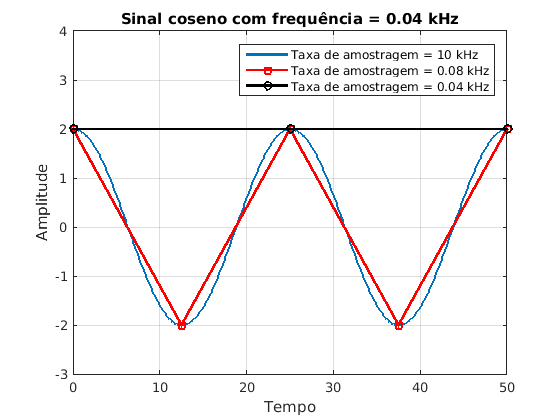

In [1]:
clc; close all;clear all;                           % Limpa variáveis e fecha todos os gráficos
%% Geração do sinal cosenoidal
fsampling = 10;                                     % Taxa de amostragem  (kHz)
tf = 200;                                           % Tempo final 
t = 0 : (1/fsampling) : tf;                         % Vetor tempo discreto, obedecendo o tempo de amostragem
fm = 0.04;                                          % Frequência do sinal senoidal
Am = 2;                                             % Amplitude do sinal senoidal
m = Am*cos(2*pi*fm*t);                              % Geração de amostras do sinal senoidal

plot(t,m,'linewidth',2);                            % Plota gráfico do coseno com taxa de amostragem fsampling
xlabel('Tempo');                                    % Definição do texto do eixo X
ylabel('Amplitude');                                % Definição do texto do eixo Y 
grid on;                                            % Desenhar o grid do gráfico                           
hold on;                                            % Comando para plotar multiplas linhas no mesmo gráfico

%% Gráfico do coseno com nova taxa de amostragem = 0.08 (o dobro da banda do sinal)
fsampling = 0.08;                                   % Taxa de amostragem (kHz)
t2 = 0 : (1/fsampling) : tf;                        % Geração de amostras do sinal m(t) com nova taxa de amostragem
m2 = Am*cos(2*pi*fm*t2);                            % Geração de amostras do sinal m(t) com nova taxa de amostragem    
plot(t2,m2,'r-s','linewidth',2);                    % Plota com nova taxa de amostragem (linha com marcador quadrado) 

%% Gráfico do coseno com nova taxa de amostragem = 0.04 (igual a banda do sinal)
fsampling = 0.04;                                   % Taxa de amostragem (kHz)
t3 = 0 : (1/fsampling) : tf;                        % Geração de amostras do sinal m(t) com nova taxa de amostragem
m3 = Am*cos(2*pi*fm*t3);                            % Geração de amostras do sinal m(t) com nova taxa de amostragem
plot(t3,m3,'k-o','linewidth',2);                    % Plota com nova taxa de amostragem (linha com marcador circular) 
legend('Taxa de amostragem = 10 kHz',...
'Taxa de amostragem = 0.08 kHz',...
'Taxa de amostragem = 0.04 kHz');                   % Adiciona legenda ao gráfico
title('Sinal coseno com frequência = 0.04 kHz');    % Adiciona título ao gráfico
axis([0 2*1/fm -3 4]);                              % Zoom em dois períodos da onda

% A função 'whos' é responsável por mostrar todas as variáveis que foram criadas no workspace,
% identificando suas principais caracteristicas.
whos

Algumas perguntas podem ser levantadas e respondidas usado o script acima, entre elas:

- Qual a influência da taxa de amostragem na visualização (reconstrução) do sinal?

- Qual a influência da taxa de amostragem no número de pontos do sinal discreto no tempo?



Vamos discutir essas perguntas a seguir.

Obeserve a figura gerada pelo script e compare os três sinais gerados. O primeiro (em azul sem marcador), atendendo o critério de Nyquist, gera um cosseno correto. Já o segundo cosseno gerado (em vermelho com marcador quadrado) está no limite da taxa de Nyquist, sofrendo aliasing e se apresentando como um sinal triangular no tempo. Note que neste caso, o tempo de amostragem é igual a meio período, coletando amostras de picos do cosseno. Já o terceiro sinal (em preto com marcador circular) está com taxa de amostragem igual a banda do sinal, o que equivale a um tempo de amostragem igual ao período. Neste caso, o aliasing gera um sinal constante no tempo, resultado da coleta das amostras de pico positivo da onda cossenoidal.

Observando a saída de texto do script (saída do comando _whos_), foram criadas 2001 amostras para o primeiro sinal, 17 e 9 amostras para o segundo e o terceiro sinal, respectivamente. Note que o vetor _t_ foi gerado obedencendo o **tempo de amostragem**, calculado pela **taxa de amostragem** definida na variável _fsampling_ de cada caso. Assim, as ondas geradas correspondem aos elementos do vetor _t_ aplicados a função cossenoidal, os quais tem tamanho diferentes para cada caso de taxa de amostragem. 

**Passo 2:** Escreva um script trocando cosseno por seno e verifique o que acontece com as curvas.

# Conteúdo em frequência do sinal

O conteúdo em frequência de um sinal pode ser analisado pela família de transformadas de Fourier. A análise de Fourier se deve ao físico e matemático Francês Jean Baptiste Joseph Fourier (1768-1830). 

Essencialmente, a análise de Fourier define um par de formulações. Uma formulação **direta** representa o conteúdo espectral do sinal, enquanto que a formulação **inversa** reconstrói a sinal correspondente no domínio do tempo por meio de seu conteúdo espectral.

O tipo de ferramenta de Fourier depende do tipo de sinal a ser analisado, existindo os quatro casos:

> 1) Sinal contínuo no tempo e periódico: O sinal por ser escrito como um somatório infinito de senos, cossenos ou exponenciais com  amplitudes diferentes. Isso define a **Série de Fourier** e sua inversa.

> 2) Sinal contínuo no tempo e não periódico: A série de Fourier pode ser escrita para números complexos e generalizada de forma infinitesimal para derivar a **Transformada de Fourier**.

> 3) Sinal discreto no tempo e periódico: O sinal é escrito como um somatório finito de base exponeciais, definindo a **Transformada Discreta de Fourier (DFT)**.

> 4) Sinal discreto no tempo e não periódico: generalizando a DTF de forma infinitesimal obtermos a **Transformada de Fourier Discreta no Tempo (DTFT)**.

A maioria das ferramentas de Fourier envolve somatórios que se estendem de -$\infty$ a +$\infty$. Isso é "relativamente" fácil de manipular em exercícios de sala de aula, mas como será que essas ferramentas serão tratadas com um número finito de amostras em um computador? De fato, falar em computador é falar de sinais discretos, o que reduz nosso trabalho a escolher entre duas ferramentas, a DFT (apropriada para sinais periódicos) ou a DTFT (apropriada para qualquer sinal).

De fato, senos e cossenos se estendem de -$\infty$ a +$\infty$ e nós não podemos usar, em um computador, sinais infinitamente longos para sinterizar outro sinal de tamanho finito. Uma forma de resolver esse dilema é fazer os dados finitos parecerem um sinal de tamanho infinito. Podemos imaginar que um sinal de 1024 pontos tem infinitos pontos para a direita e a esquerda. Se esses pontos forem igual a zero, temos um sinal não-periódico e podemos aplicar a DTFT. Como alternativa, podemos imaginar que as amostras a direita e a esquerda, antes iguais a zero, podem ser cópias dos 1024 pontos do sinal finito, formando um sinal discreto e periódico. Nesse segundo sinal que imaginamos podemos usar a DTF.

Por sua vez, um número infinito de senoides precisa ser usado para sintetizar sinais não-periódicos (DTFT), o que torna impossível o cálculo da DTFT em um computador. Assim, por eliminação, o único tipo de ferramenta de Fourier que pode ser usado em uma DSP é a DFT. Em outras palavras, computadores só podem trabalhar com sinais (informação) discreta e finita. Assim, ao mostrar o espectro de um sinal em um computador, você estará calculando a DFT!

Dito isso, para visualizarmos o conteúdo em frequência no computador lançamos mão da DFT, a qual tem a seguinte definição:

$$ X_k = \sum_{n=0}^{N-1} x[n] \cdot  e^{-j \left( \frac{2\pi}{N}\right)k \cdot n}$$

A transformada inversa é dada por:

$$ x[n] = \sum_{n=0}^{N-1} X_k \cdot  e^{j \left( \frac{2\pi}{N}\right)k \cdot n}$$

## DFT no Matlab

A função **fft(x)** retorna a transformada discreta de Fourier (DFT) do vetor _x_ calculado com o algorítmo FFT (_Fast Fourier Transform_). Por ser uma função **Built-in**, ela é protegida pelo Matlab, de forma que não é possível visualizá-la, mesmo que você digite os comandos **open fft** ou **edit fft**. Entretanto, é possível ver as descrições e exemplos com o comando "help fft".

Clique em **doc fft**, que um conjunto de informações adicionais.

In [3]:
% Descrição rápida da fft do Matlab
help fft

 FFT Discrete Fourier transform.
    FFT(X) is the discrete Fourier transform (DFT) of vector X.  For
    matrices, the FFT operation is applied to each column. For N-D
    arrays, the FFT operation operates on the first non-singleton
    dimension.
 
    FFT(X,N) is the N-point FFT, padded with zeros if X has less
    than N points and truncated if it has more.
 
    FFT(X,[],DIM) or FFT(X,N,DIM) applies the FFT operation across the
    dimension DIM.
    
    For length N input vector x, the DFT is a length N vector X,
    with elements
                     N
       X(k) =       sum  x(n)*exp(-j*2*pi*(k-1)*(n-1)/N), 1 <= k <= N.
                    n=1
    The inverse DFT (computed by IFFT) is given by
                     N
       x(n) = (1/N) sum  X(k)*exp( j*2*pi*(k-1)*(n-1)/N), 1 <= n <= N.
                    k=1
 
    See also FFT2, FFTN, FFTSHIFT, FFTW, IFFT, IFFT2, IFFTN.

    Other functions named fft:
       uint8/fft
       uint16/fft
       iddata/fft
       codistributed

# Prática 2: Amplitude do espectro _single sided band_

**Passo 1:** Abra o Matlab e digite no _Command Window_ o seguinte comando:

> ```python
edit fft
```

Isso abrirá o arquivo **fft.m**. Observe que ele não tem código implementado (é uma função _Built-in_), geralmente implementada em C++, e com código escondigo.

**Passo 2:** Agora digite no _Command Window_ o seguinte comando:

> ```python
edit psd
```

Isso abrirá o arquivo **psd.m**. Observe que ele não é uma função _Built-in_ e você pode ver seu código na íntegra.

**Passo 3:** Antes de usar a função do Matlab, vamos implementar um algorítmo para a DFT utilizando sua definição. Abra um script no Matlab, salve-o como **handson3_2.m** e escreva o seguinte código:

Tempo da DFT = 5.0313 s
  Name              Size                 Bytes  Class     Attributes

  Am                1x1                      8  double              
  L                 1x1                      8  double              
  N                 1x1                      8  double              
  T                 1x1                      8  double              
  WN                1x1                     16  double    complex   
  WNnk           2000x2000            64000000  double    complex   
  X                 1x2000               32000  double    complex   
  f                 1x1001                8008  double              
  fm                1x1                      8  double              
  fsampling         1x1                      8  double              
  k                 1x2000               16000  double              
  m                 1x2000               16000  double              
  n                 1x2000               16000  double              
  nn     

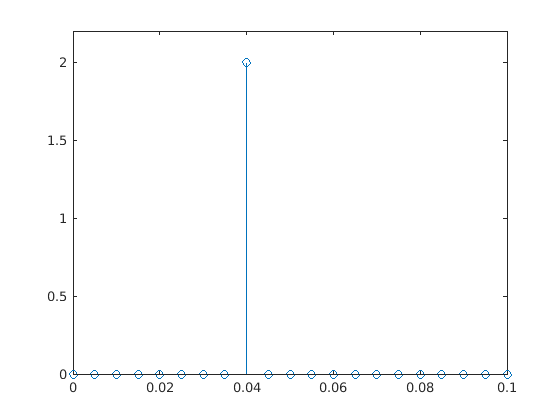

In [6]:
clc; close all;clear all;                             % Limpa variáveis e fecha todos os gráficos
%% Geração do sinal cosenoidal
fsampling = 10;                                       % Taxa de amostragem
T =1/fsampling;                                       % Tempo entre amostras
L = 2000;                                             % Número de amostras
t = 0 : (1/fsampling) : (L-1)*T;                      % Eixo do tempo
fm = 0.04;                                            % Frequência da senoide
Am = 2;                                               % Amplitude da senoide
m = Am*cos(2*pi*fm*t);                                % Sinal senoidal
t1=tic;                                               % Contador de tempo

%% Montando a DFT
N=length(m);                                          % Comprimento do sinal m(t)
n=0:N-1;                                              % Vetor n
k=0:N-1;                                              % Vetor k
WN=exp(-j*2*pi/N);                                    % Cálculo de Wn = e^{-j2pi/N}
nn=n'*k;                                              % Monta a Matriz DFT
WNnk=WN.^nn;                                          % Monta a Matriz DFT
X=m*WNnk/L;                                           % Implementa o somatório da DFT via operação matricial    
f = fsampling/2*linspace(0,1,(L/2)+1);                % Monta o eixo das frequências
tempo_DFT=toc(t1);                                    % Conta tempo de execução até esse ponto do código
disp(['Tempo da DFT = ' num2str(tempo_DFT) ' s']);    % Mostra tempo
stem(f,2*abs(X(1:L/2+1)));                            % Mostra gráfico do espectro 
axis([ 0 0.1 0 2.2]);                                 % Zoom para melhor visualização 
% A função 'whos' é responsável por mostrar todas as variáveis que foram criadas no workspace,
% identificando suas principais caracteristicas.
whos

Inspecione o código com calma. Veja o tamanho das variáveis criadas e tente entender a forma matricial de como foi calculado o somatório da DFT.

# Prática 3: Amplitude do espectro usando as funções do Matlab

Tendo em mãos o sinal a ser analizado, mediremos o espectro na frequência realizando os seguintes procedimentos:
- Determinar o comprimento do vetor da fft;
- Frequência de amostragem (que deve ser a mesma do sinal no tempo);
- Normalizar;
- Definir o eixo da frequência de acordo com o comprimento e a taxa de amostragem da fft.

Usaremos agora a função stem ao invés da função plot, isso facilitará nossa visualização no eixo da frequência (será explicado mais à frente). A resolução mínima de frequência irá determinar o número de pontos da fft. Então faça as seguintes etapas aproveitando o script passado:

Tempo da FFT = 0.46412


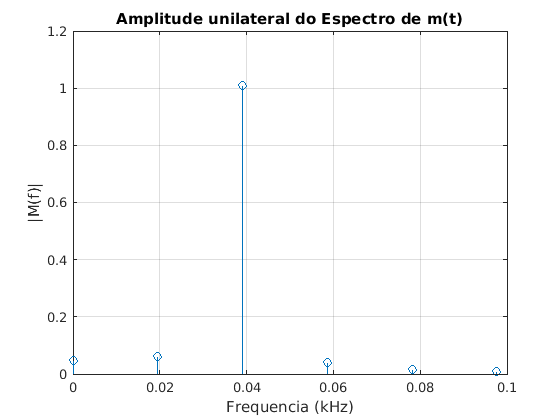

In [4]:
clc; close all;clear all;

%% Geração do sinal cosenoidal
fsampling = 10; % kHz
tf = 200; % segundos
t = 0 : (1/fsampling) : tf;
fm = 0.04;
Am = 2;
m = Am*cos(2*pi*fm*t);
t1=tic;

%% Visualizando a amplitude do espectro com um tamanho arbitrário para a fft
lfft = 512;
% Taxa de amostragem
fsampling = 10; % kHz
% Plot do sinal M(f): single-sided amplitude spectrum.
% Abrir nova figure
figure;
% Cálculo da fft
yfft = fft(m,lfft)/lfft;
% Definição do eixo das frequências unilateral
freq1 = [0 : fsampling/lfft : fsampling/2 - fsampling/lfft];
% fft unilateral
yfftuni = yfft(1:lfft/2); 
% Plotagem do espectro M(f)
stem(freq1,abs(yfftuni))
  
tempo_FFT=toc(t1);
disp(['Tempo da FFT = ' num2str(tempo_FFT)]);
% Configuração do gráfico
title('Amplitude unilateral do Espectro de m(t)')
xlabel('Frequencia (kHz)')
ylabel('|M(f)|')
% Adiona o grid
grid on;
axis([ 0 0.1 0 1.2])

Podemos ver que quando a curva se aproxima de 0.04KHz a amplitude cresce e em seguida decresce. Pelo gráfico, vemos que o pico não está centrado em 0.04kHz. Isso é muito comum de acontecer, e deve ao fato de que o eixo da frequência não está definido o valor de 0.04. Veja que ela está definida em  0.0391 kHz e  0.0586 kHz, por isso o gráfico está aparentemente deslocado. Caso estivesse definido em 0.04 haveria o pico máximo. Abaixo segue o vetor freq1:

In [29]:
% Seis primeiros termos do vetor freq1 mostram que ele não está definido em 0.04 kHz.
freq1(1,1:6)


ans =

         0    0.0195    0.0391    0.0586    0.0781    0.0977




ans =

         0    0.0100    0.0200    0.0300    0.0400    0.0500



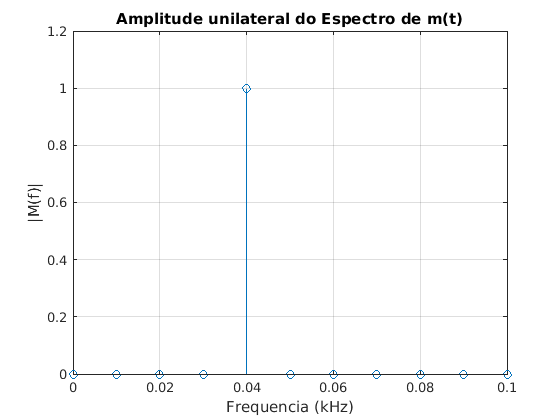

In [6]:
clc; close all;clear all;

%% Geração do sinal cosenoidal
fsampling = 10; % kHz
tf = 200; % segundos
t = 0 : (1/fsampling) : tf;
fm = 0.04;
Am = 2;
m = Am*cos(2*pi*fm*t);


%% Visualizando a amplitude do espectro com um tamanho arbitrário para a fft
% Novo LFFT
lfft = 1000;
% Taxa de amostragem
fsampling = 10; % kHz
% Plot do sinal M(f): single-sided amplitude spectrum.
% Abrir nova figure
figure;
% Cálculo da fft
yfft = fft(m,lfft)/lfft;
% Definição do eixo das frequências unilateral
freq1 = [0 : fsampling/lfft : fsampling/2 - fsampling/lfft];
% fft unilateral
yfftuni = yfft(1:lfft/2); 
% Plotagem do espectro M(f)
stem(freq1,abs(yfftuni))
% Configuração do gráfico
title('Amplitude unilateral do Espectro de m(t)')
xlabel('Frequencia (kHz)')
ylabel('|M(f)|')
% Adiona o grid
grid on;
axis([ 0 0.1 0 1.2])


% Seis primeiros termos do vetor freq1. Agora está definido em 0.04 kHz.
freq1(1,1:6)

O motivo de usar a função stem () no lugar de plot() é que esta última faz a ligação dos pontos subsequentes e os aproxima como retas, o que fugiria bastante da realidade. O código abaixo ilustra os dois casos. Corrigiremos esse erro definindo um novo valor para o nosso comprimento de fft (lfft):

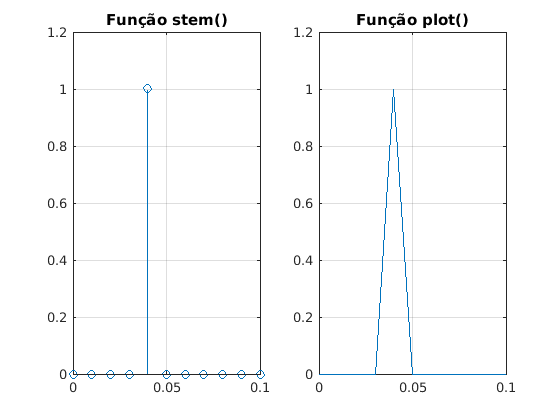

In [3]:
clc; close all;clear all;

%% Geração do sinal cosenoidal
fsampling = 10; % kHz
tf = 200; % segundos
t = 0 : (1/fsampling) : tf;
fm = 0.04;
Am = 2;
m = Am*cos(2*pi*fm*t);


%% Visualizando a amplitude do espectro com um tamanho arbitrário para a fft
% Novo LFFT
lfft = 1000;
% Taxa de amostragem
fsampling = 10; % kHz
% Plot do sinal M(f): single-sided amplitude spectrum.
% Abrir nova figure
figure;
% Cálculo da fft
yfft = fft(m,lfft)/lfft;
% Definição do eixo das frequências unilateral
freq1 = [0 : fsampling/lfft : fsampling/2 - fsampling/lfft];
% fft unilateral
yfftuni = yfft(1:lfft/2); 


%% Plotando o eixo da frequência com stem() e plot():


% Colocando a frequência em stem() no lado direito; 
subplot(1,2,1)
% Plotando a freqência em stem()
stem(freq1,abs(yfftuni))
grid on;
title('Função stem()')
axis([ 0 0.1 0 1.2])


% Colocando a frequência em plot() no lado esquerdo;
subplot(1,2,2)
% Plotando a freqência em plot()
plot(freq1,abs(yfftuni))
grid on;
title('Função plot()')
axis([ 0 0.1 0 1.2])


### Double-sided amplitude spectrum

Queremos mostrar agora os dois lados do eixo da frequência. Para isso definiremos alguns vetores de forma diferente.

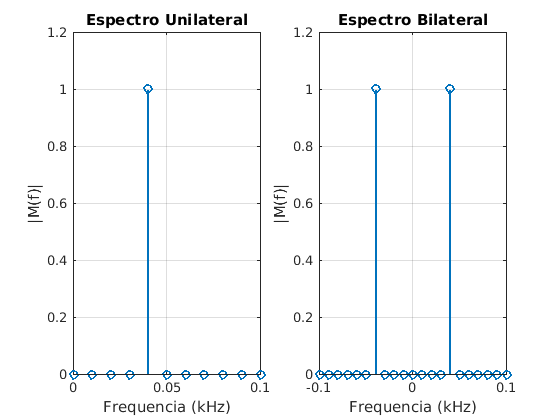

In [2]:
clc; close all;clear all;

%% Geração do sinal cosenoidal
fsampling = 10; % kHz
tf = 200; % segundos
t = 0 : (1/fsampling) : tf;
fm = 0.04;
Am = 2;
m = Am*cos(2*pi*fm*t);


%% Plot do sinal M(f): single-sided amplitude spectrum.
% Visualizando a amplitude do espectro com um tamanho arbitrário para a fft
lfft = 1000;
% Taxa de amostragem
fsampling = 10; % kHz
% Colocando as frequência no lado direito; 
subplot(1,2,1)
% Cálculo da fft
yfft = fft(m,lfft)/lfft;
% Definição do eixo das frequências unilateral
freq1 = [0 : fsampling/lfft : fsampling/2 - fsampling/lfft];
% fft unilateral
yfftuni = yfft(1:lfft/2); 
% plotagem do espectro M(f)
stem(freq1,abs(yfftuni),'linewidth',2)
% configuração do gráfico
title('Espectro Unilateral')
xlabel('Frequencia (kHz)')
ylabel('|M(f)|')
% adiona o grid
grid on;
axis([ 0 0.1 0 1.2])


%% Plot do sinal M(f): double-sided amplitude spectrum.
% Colocando as frequência no lado esquerdo; 
subplot(1,2,2)
% Comprimento da FFT
lfft = 1000;
% Cálculo da fft
yfft = fft(m,lfft)/lfft;
% fftshift para rotacionar fft
ym = fftshift(yfft);
% Nova eixo da frequencia incluindo parte positiva e negativa
freq = [-fsampling/2 : fsampling/lfft : fsampling/2 - fsampling/lfft];
% Plotagem do espectro M(f)
stem(freq,abs(ym),'linewidth',2)
% Configuração do gráfico
title('Espectro Bilateral')
xlabel('Frequencia (kHz)')
ylabel('|M(f)|')
% adiona o grid
grid on;
% Definição da cor da figura para branca
set(gcf,'color',[1 1 1]);
% Delimita eixo para melhor visualização
axis([ -0.1 0.1 0 1.2])


[> In spectrum (line 111)] 


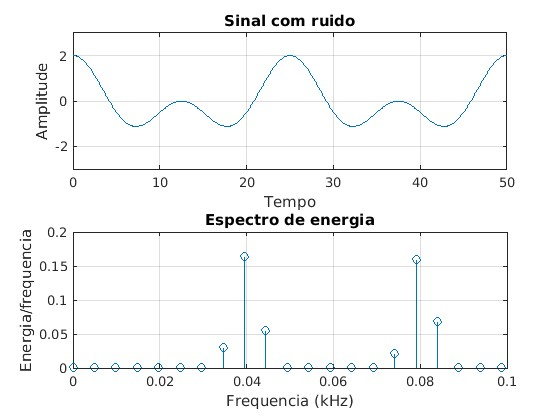

In [8]:
clc; close all;clear all;

%% Geração do sinal cosenoidal
fsampling = 10; % kHz
tf = 200; % segundos
t = 0 : (1/fsampling) : tf;
fm = 0.04;
Am = 1;
% Sinal com frequencia 2x fm
m = Am*cos(2*pi*fm*t)+ Am*cos(2*pi*(2)*fm*t);
% Colocando ruido
%m= m + randn(size(t));

%% Gráfico do coseno com ruído
subplot(2,1,1)
plot(t,m);
title('Sinal com ruido')
xlabel('Tempo');
ylabel('Amplitude');
grid on;
axis([0 2*(1/fm) -3 3])

%% Plot do sinal M(f): single-sided amplitude spectrum.
% Número de pontos do spectro
lspc = 2024;
% frequência de amostragem
fsampling = 10;
% Função spectrum normalizada
yspc = spectrum(m,lspc)/lspc;
% Definição do eixo das frequências unilateral
freq1 = [0 : fsampling/lspc : fsampling/2 - fsampling/lspc];
% fft unilateral
yspcuni = yspc(1:lspc/2); 
% plotagem do espectro M(f)
subplot(2,1,2)
% função do espectro de energia
stem(freq1,abs(yspcuni))
% configuração do gráfico
title('Espectro de energia')
xlabel('Frequencia (kHz)')
ylabel('Energia/frequencia')
% adiona o grid
grid on;
axis([ 0 0.1 0 0.2])


### Janelamento (Windowing)
Janelamento ou truncamento é uma função que limita a duração do sinal, chamada de janela, determinando o comprimento (L) do sinal analisado na frequência, podendo modificar o sinal original no tempo e em frequência. 

A transformada de Fourier de um sinal em janela corresponde à convolução periódica da transformada de Fourier da janela $\omega(n)$ com a transformada de Fourier do sinal original $x(n)$.
Devido à estrutura de lóbulo de uma janela, a convolução resulta em fuga de um componente de frequência para frequências adjacentes. Além disso, o lóbulo principal de uma janela é responsável por distorcer componentes de freqüência e, portanto, reduzindo a resolução de freqüência. Matematicamente entende-se janelamento como:

$$V(n)=x(n) \cdot  \omega(n)$$
em que $\omega(n)$ é a janela que limita $x(n)$.


A necessidade do janelamento é vista a medida em que a DFT não pode ser aplicada em um sinal infinito. Em termos matemáticos:

$$V(e^{jw}) = \frac{1}{2\pi}\int_{-\pi}^{\pi}X(e^{j\theta }) \cdot  W(e^{j(w-\theta)})d\theta  $$

O script abaixo ilustra o janelamento e seu efeito no tempo e na frequência:

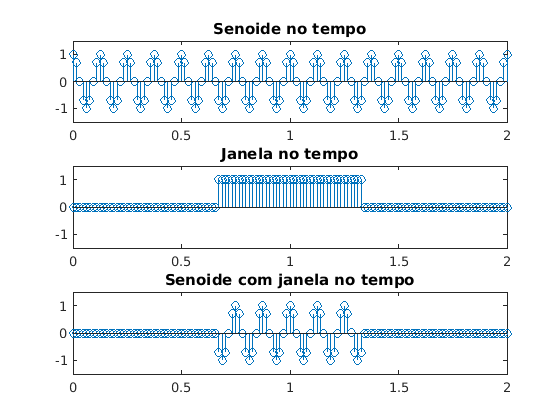

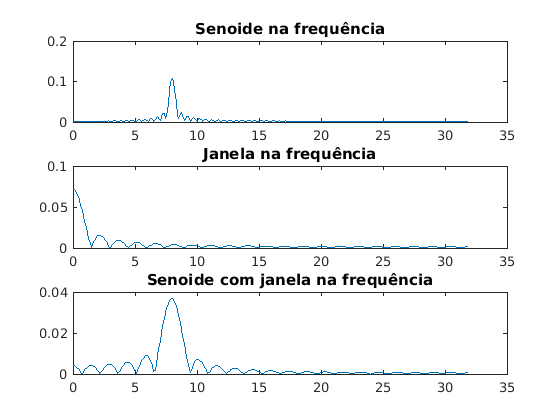

In [8]:
clc; close all;clear all;

%% Geração da janela
fsampling = 64;                         % Frequência de amostragem em kHz
tf = 2;                                 % Segundos
t = 0 : (1/fsampling) : tf;             % Determinação do eixo do tempo
fm = 8;                                 % Frequência do sinal
Am = 1;                                 % Amplitude do sinal
m1 = Am*cos(2*pi*fm*t);                 % Sinal senoidal puro
m2 = zeros(size(t));                    % Sinal zeros
m2(length(t)/3+1:length(t)*2/3)=1;      % Sinal zeros com "1" no intervalo de 1/3 do seu comprimento a 2/3
m=m1.*m2;                               % Sinal resultante

%% Janela do sinal na frequência
lfft = 600;                             % Número de pontos da fft
m1fft = fft(m1,lfft)/lfft;              % Cálculo da fft para a senoide
m2fft = fft(m2,lfft)/lfft;              % Cálculo da fft para a janela
mfft = fft(m,lfft)/lfft;                % Cálculo da fft para sinal com janela
% Definição do eixo das frequências unilateral
freq1 = [0 : fsampling/lfft : fsampling/2 - fsampling/lfft];
m1fftuni = m1fft(1:lfft/2);             % fft unilateral senoide
m2fftuni = m2fft(1:lfft/2);             % fft unilateral janela
mfftuni = mfft(1:lfft/2);               % fft unilateral senoide com janela

%% Plotting

% Senoide discreta na frequência
subplot(3,1,1)
plot(freq1,abs(m1fftuni))
title('Senoide na frequência' )
subplot(3,1,2)
plot(freq1,abs(m2fftuni))
title('Janela na frequência' )
subplot(3,1,3)
plot(freq1,abs(mfftuni))
title('Senoide com janela na frequência' )
figure()

% Senoide discreta no tempo
subplot (3,1,1)
stem(t,m1)
axis([0 2 -1.5 1.5])
title('Senoide no tempo' )
% Janela Retangula no tempo
subplot (3,1,2)
stem(t,m2)
axis([0 2 -1.5 1.5])
title('Janela no tempo' )
% Senoide com janela no tempo
subplot (3,1,3)
stem(t,m)
axis([0 2 -1.5 1.5])
title('Senoide com janela no tempo' )


A fim de aumentar a resolução de freqüência, precisamos fazer o lobo principal da janela o mais estreito possível e para reduzir o vazamento, e o lóbulo lateral o menor possível. Para isso faremos uso das janelas mostradas no script abaixo:

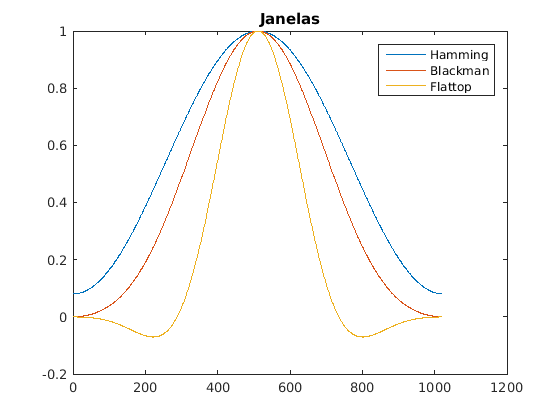

In [3]:
N = 1024;                                       % Número de amostras da janela
y1=hamming(N);                                  % Janela tipo Hamming
y2=blackman(N);                                 % Janela tipo Blackman
y3=flattopwin(N);                               % Janela tipo Flattop
x= 0:1:N-1;                                     % Determinando eixo X
plot(x,y1,x,y2,x,y3)                            % Plotando o gráfico
legend('Hamming','Blackman','Flattop')      % Legendas 
title('Janelas')                                % Título

Faremos agora a visualização do espectro de um sinal de 30kHz mostrando numa janela retangular e outra janela tipo Hamming. Calcularemos e mostraremos a sua magnitude em dB.

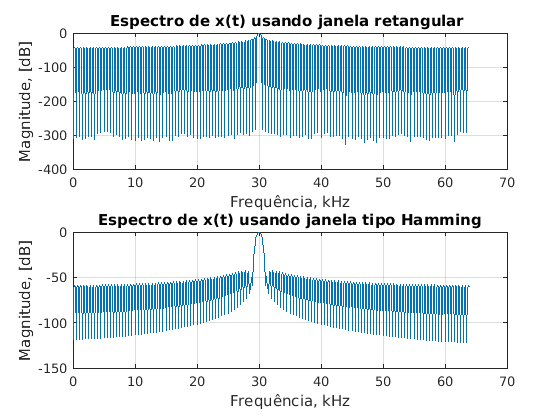

In [9]:
clc; clear all;close all;
%% Parâmetros da onda
f1=30;                 % Frequência do sinal em kHz
fs=128;                % Frequência de amostragem em kHz
N=256;                 % Número de amostras
N1=1024;               % Número de pontos da fft
n=0:N-1;               % Index n
f=(0:N1-1)*fs/N1;      % Definição do eixo da frequência [axis]
x=cos(2*pi*f1*n/fs);   % Gerando o sinal
XR=abs(fft(x,N1));     % Encontra a magnitude da FFT usando janela retangular (sem janela)
xh=hamming(N);         % Define a amostra em Hamming
xw=x .* xh';           % Colocando a janela Hamming no sinal 
XH=abs(fft(xw,N1));    % Encontra a magnitude da frequência
                       % Sinal com janela
%% Plotagem do sinal

% Sinal sem janela (retangular)
subplot(2,1,1);
plot(f(1:N1/2),20*log10(XR(1:N1/2)/max(XR)));
title('Espectro de x(t) usando janela retangular ');
grid;
xlabel('Frequência, kHz');
ylabel('Magnitude, [dB]');

% Sinal com janela Hamming
subplot(2,1,2);
plot(f(1:N1/2),20*log10(XH(1:N1/2)/max(XH)));
title('Espectro de x(t) usando janela tipo Hamming');
grid;
xlabel('Frequência, kHz');
ylabel('Magnitude, [dB]');

Percebe-se que para ambos espectros (janela retangular e janela Hamming) têm pico em 30kHz o que corresponde a frequencia do sinal gerado, como esperávamos. Entretanto na janela retangular o lóbulo principal é mais estreito em relação ao Hamming diminuindo o pico de dos lóbulos adjacentes.

# Bibliografia

Steven W. Smith, The Scientist and Engineer's Guide to Digital Signal Processing (http://www.dspguide.com/ch8/1.htm).

Steve Mann, The Discrete Fourier Transform (http://wearcam.org/ece431/course_material/fourierop_and_dit.htm).

Wikipedia: DFT matrix (https://en.wikipedia.org/wiki/DFT_matrix)
